# ROC Curve Example

### Inspired by: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
#### This is an example of how to create an ROC Curvs in sklearn vs using the Yellowbrick libarary. The data used is the breast cancer dataset that is included in sklearn.

## Import Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

## Import some data to play with

In [19]:
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [21]:
random_state = np.random.RandomState(0)
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=random_state)

## Split the data and prepare data for ROC Curve

In [22]:
# Learn to predict each class against the other
classifier = svm.SVC(kernel='linear', probability=True, random_state=random_state)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


In [23]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


## Plot ROC Curve using Matplotlib

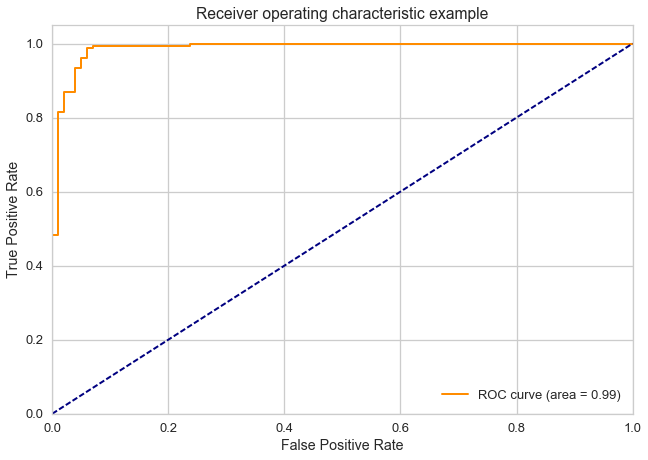

In [24]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Create ROCAUC using YellowBrick

In [25]:
import yellowbrick as yb 
from yellowbrick.classifier import ROCAUC

In [26]:
visualizer = ROCAUC(classifier)

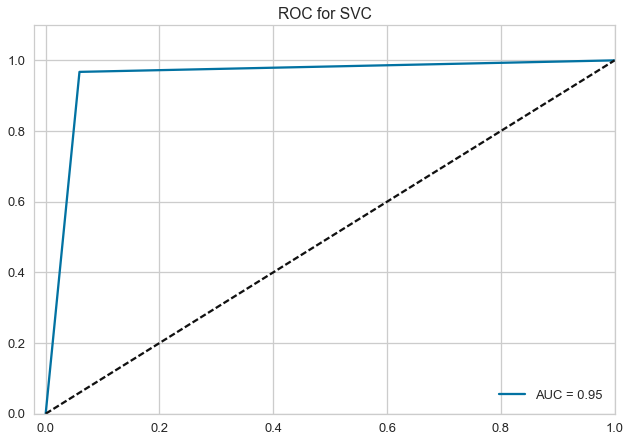

In [27]:
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
g = visualizer.poof()             # Draw/show/poof the data